In [13]:
np.random.seed(42)
tf.random.set_seed(42)
import random
random.seed(42)


In [3]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from concurrent.futures import ThreadPoolExecutor, as_completed

In [4]:
# Load the data
file_path = r"C:\Users\nahid\Desktop\USFS\Project_USFS\Data\WASHINGTON_DC_2013_ndvi_metrics_cover.csv"
df = pd.read_csv(file_path)

# Select the dependent variable (NDVI)
y = df['NDVIMEAN']  

# Select the independent variables (land cover classifications)
X = df[['WATER', 'IMPERVIOUS', 'SOIL_BARREN', 'TREES_FOREST', 
        'GRASS_HERBACEOUS', 'AGRICULTURE', 'WOODY_WETLANDS', 
        'EMERGENT_WETLANDS']]

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Build the model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.3, verbose=1)


Epoch 1/100


c:\Users\nahid\Desktop\USFS\Project_USFS\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


92107/92107 ━━━━━━━━━━━━━━━━━━━━ 81s 868us/step - loss: 0.0125 - mae: 0.0804 - val_loss: 0.0101 - val_mae: 0.0738
Epoch 2/100
92107/92107 ━━━━━━━━━━━━━━━━━━━━ 79s 859us/step - loss: 0.0109 - mae: 0.0760 - val_loss: 0.0101 - val_mae: 0.0739
Epoch 3/100
92107/92107 ━━━━━━━━━━━━━━━━━━━━ 79s 860us/step - loss: 0.0109 - mae: 0.0759 - val_loss: 0.0101 - val_mae: 0.0738
Epoch 4/100
92107/92107 ━━━━━━━━━━━━━━━━━━━━ 79s 857us/step - loss: 0.0108 - mae: 0.0759 - val_loss: 0.0103 - val_mae: 0.0744
Epoch 5/100
92107/92107 ━━━━━━━━━━━━━━━━━━━━ 78s 843us/step - loss: 0.0109 - mae: 0.0761 - val_loss: 0.0101 - val_mae: 0.0737
Epoch 6/100
92107/92107 ━━━━━━━━━━━━━━━━━━━━ 78s 847us/step - loss: 0.0109 - mae: 0.0761 - val_loss: 0.0102 - val_mae: 0.0738
Epoch 7/100
92107/92107 ━━━━━━━━━━━━━━━━━━━━ 77s 834us/step - loss: 0.0110 - mae: 0.0764 - val_loss: 0.0099 - val_mae: 0.0731
Epoch 8/100
92107/92107 ━━━━━━━━━━━━━━━━━━━━ 78s 842us/step - loss: 0.0110 - mae: 0.0765 - val_loss: 0.0104 - val_mae: 0.0756
Epoc

In [7]:
# Define a function to evaluate and predict using the model
def evaluate_and_predict():
    test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
    y_pred = model.predict(X_test_scaled, verbose=0)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return test_mae, rmse, y_pred

# Use ThreadPoolExecutor to parallelize evaluation and prediction
with ThreadPoolExecutor(max_workers=2) as executor:
    future = executor.submit(evaluate_and_predict)
    test_mae, rmse, y_pred = future.result()

print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {rmse}")

Test MAE: 0.07864561676979065
Test RMSE: 0.10763649870956941


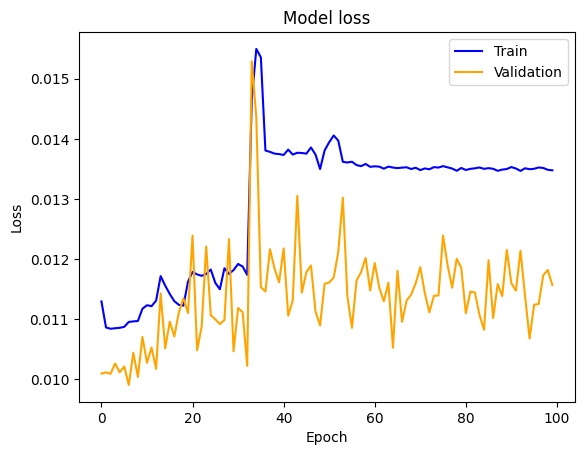

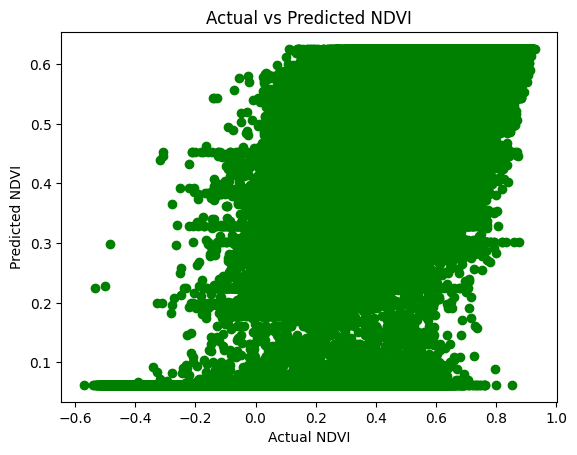

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='orange')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot predictions vs actual with different colors
plt.scatter(y_test, y_pred, c='green')  # Use green color for the scatter plot
plt.xlabel('Actual NDVI')
plt.ylabel('Predicted NDVI')
plt.title('Actual vs Predicted NDVI')
plt.show()

In [9]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Compute permutation importance
result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')

# Get the importance of each feature
importance = result.importances_mean

# Normalize importance by the maximum value to show relative importance
relative_importance = importance / np.max(importance)



56392/56392 ━━━━━━━━━━━━━━━━━━━━ 22s 397us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 23s 403us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 22s 391us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 22s 394us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 22s 396us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 23s 400us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 22s 392us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 23s 401us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 23s 400us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 23s 401us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 22s 392us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 23s 402us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 23s 401us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 22s 394us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 22s 399us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 22s 393us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 23s 403us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 22s 393us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 22s 389us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 22s 396us/step
56392/56392 ━━━━━━━━━━━━━━━━━━━━ 23s 400

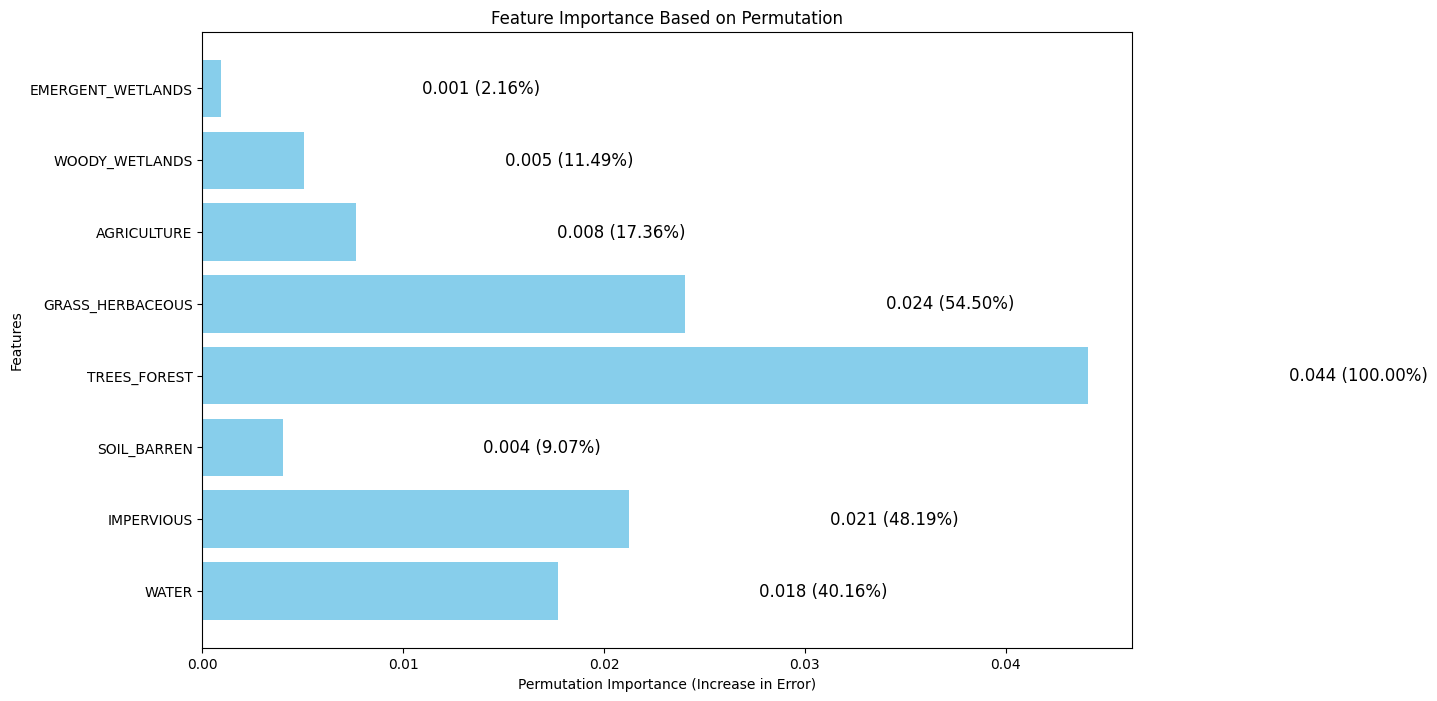

In [10]:
# Plot the feature importance
plt.figure(figsize=(12, 8))
bars = plt.barh(X.columns, importance, color='skyblue')

# Add exact values on the bars
for bar, val, rel_val in zip(bars, importance, relative_importance):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{val:.3f} ({rel_val:.2%})', 
             va='center', ha='left', color='black', fontsize=12)

plt.xlabel('Permutation Importance (Increase in Error)')
plt.ylabel('Features')
plt.title('Feature Importance Based on Permutation')
plt.show()

In [11]:
# Define a function to compute the gradient of the output with respect to the input features
def compute_saliency(model, X):
    with tf.GradientTape() as tape:
        tape.watch(X)
        predictions = model(X)
    gradient = tape.gradient(predictions, X)
    return tf.reduce_mean(tf.abs(gradient), axis=0).numpy()

# Compute saliency for the test set
X_test_tensor = tf.convert_to_tensor(X_test_scaled)
saliency = compute_saliency(model, X_test_tensor)

# Normalize the saliency scores
normalized_saliency = saliency / np.max(saliency)

# Display the saliency scores for each feature
feature_importance = pd.Series(normalized_saliency, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

TREES_FOREST         1.000000
GRASS_HERBACEOUS     0.674536
IMPERVIOUS           0.426776
WOODY_WETLANDS       0.419912
WATER                0.254706
AGRICULTURE          0.234850
EMERGENT_WETLANDS    0.179226
SOIL_BARREN          0.105566
dtype: float64
